In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Logistic Regression Problem_ Data Set - advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [4]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
pd.crosstab(df['Country'],df['Clicked on Ad']).tail(10)

Clicked on Ad,0,1
Country,,
Uruguay,4,1
Uzbekistan,1,1
Vanuatu,5,1
Venezuela,4,3
Vietnam,1,2
Wallis and Futuna,3,1
Western Sahara,3,4
Yemen,1,2
Zambia,1,3


In [8]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
type(df['Timestamp'][1])

str

In [10]:
#convert str Timestamp to string with the help of pd.to_datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
df['Month'] = df['Timestamp'].dt.month

In [12]:
df['Day'] = df['Timestamp'].dt.day

In [13]:
df['Hour'] = df['Timestamp'].dt.hour

In [14]:
df["Weekday"] = df['Timestamp'].dt.dayofweek 

In [15]:
df = df.drop(['Timestamp'], axis=1)

In [16]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,5,19,14,3
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,0,1,28,20,3
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,1,3,7,1,0
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,0,4,18,9,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,0,7,11,1,0


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

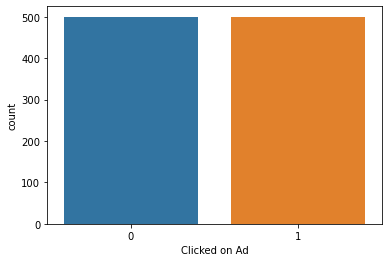

In [17]:
sns.countplot(x= df['Clicked on Ad'])

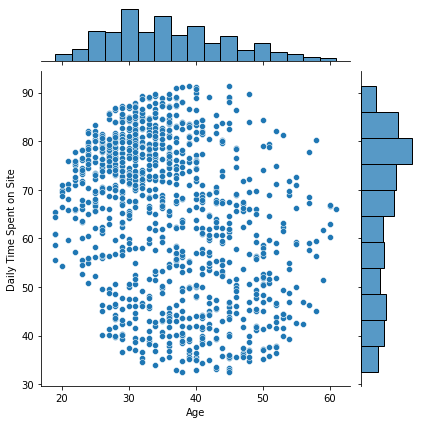

In [18]:
sns.jointplot(x = 'Age', y ='Daily Time Spent on Site', data = df)

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

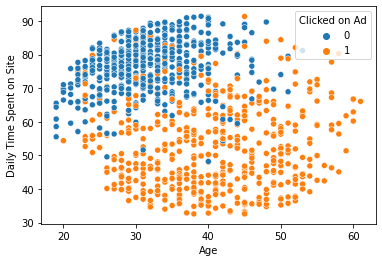

In [19]:
sns.scatterplot(x= 'Age', y= 'Daily Time Spent on Site', hue='Clicked on Ad', data=df)

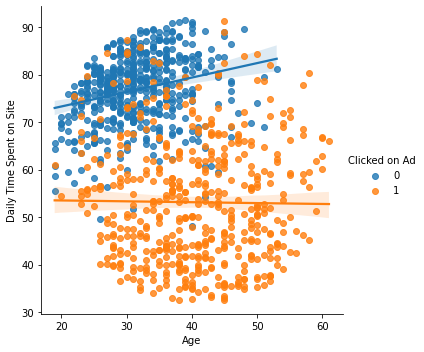

In [20]:
sns.lmplot(x= 'Age', y= 'Daily Time Spent on Site', hue='Clicked on Ad', data=df)

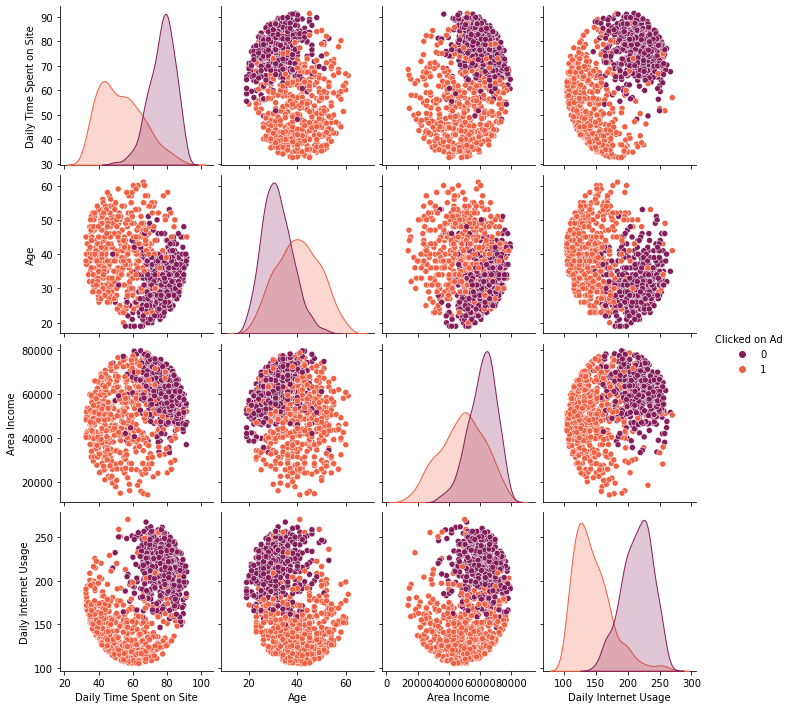

In [21]:
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


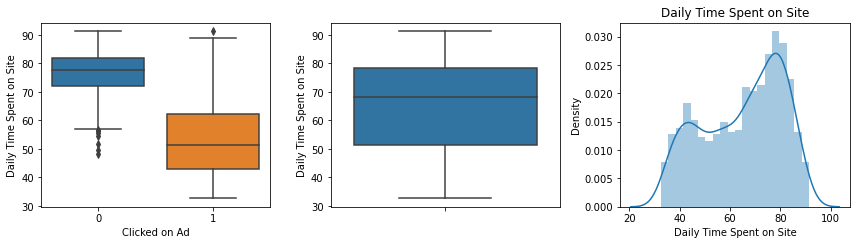

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


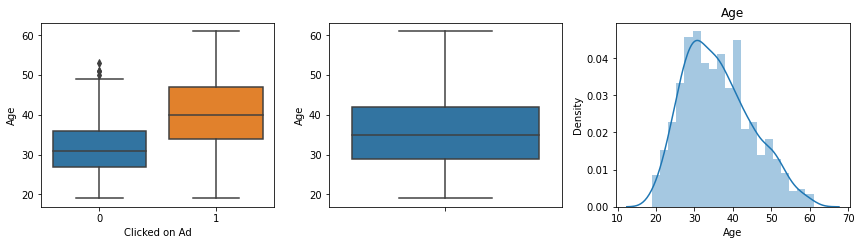

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


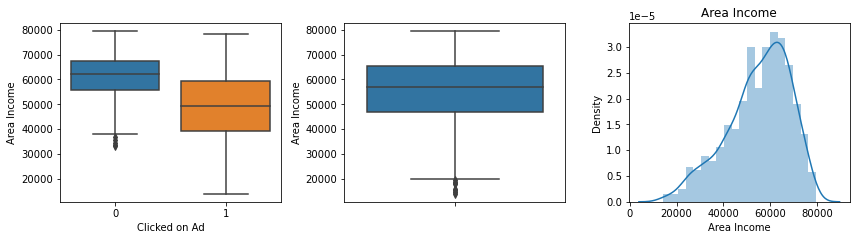

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


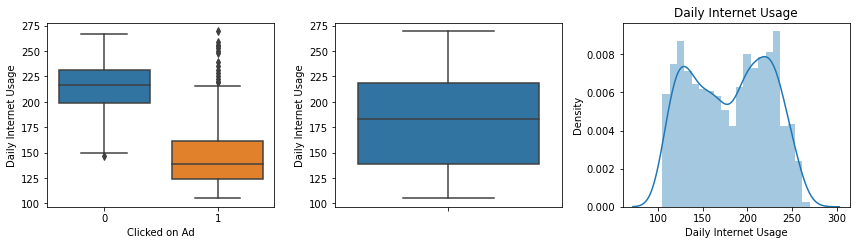

In [22]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= df, y=df[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= df, y=df[i])
    plt.subplot(2,3,3)
    sns.distplot(df[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()

In [23]:
print('oldest person didn\'t clicked on the ad was of was of:', df['Age'].max(), 'Years')
print('oldest person who clicked on the ad was of:', df[df['Clicked on Ad']==0]['Age'].max(), 'Years')

oldest person didn't clicked on the ad was of was of: 61 Years
oldest person who clicked on the ad was of: 53 Years


In [24]:
print('Youngest person was of:', df['Age'].min(), 'Years')
print('Youngest person who clicked on the ad was of:', df[df['Clicked on Ad']==0]['Age'].min(), 'Years')

Youngest person was of: 19 Years
Youngest person who clicked on the ad was of: 19 Years


In [25]:
print('Average age was of:', df['Age'].mean(), 'Years')

Average age was of: 36.009 Years


<AxesSubplot:>

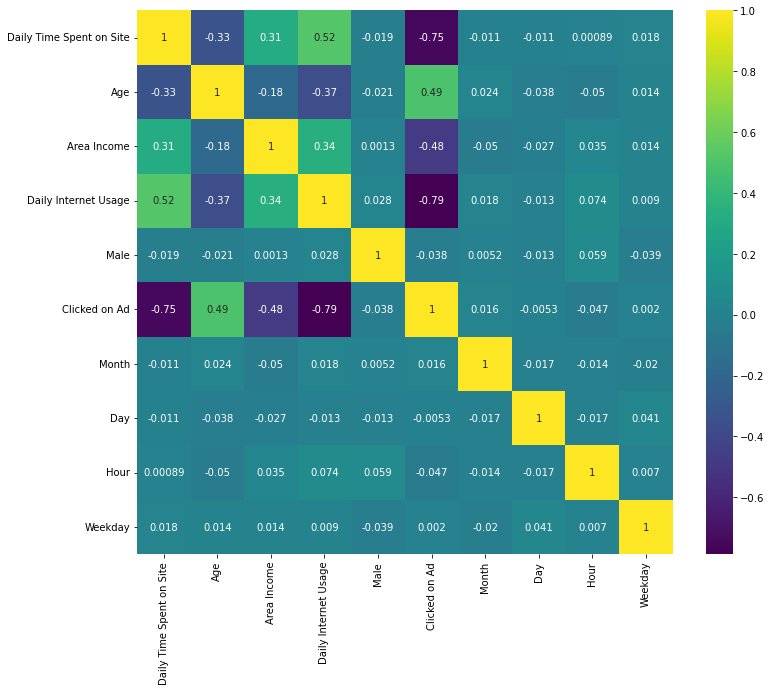

In [26]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='viridis', annot = True) 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [30]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       176
           1       0.92      0.86      0.89       154

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[164,  12],
       [ 21, 133]], dtype=int64)

Text(33.0, 0.5, 'Actual')

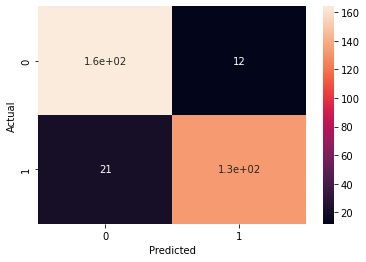

In [37]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
model.score(X_test,y_test)

0.9